# <center> FUEL CONSUMPTION

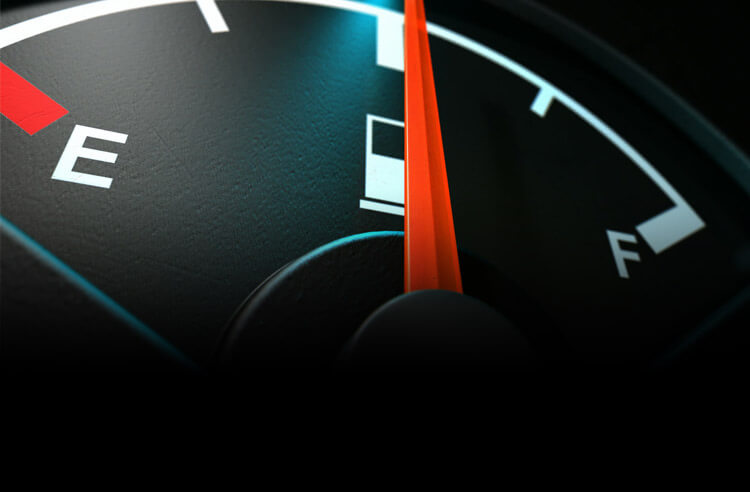<CENTER>

### Fuel consumption is the inverse of fuel economy. It is the amount of fuel consumed in driving a given distance. 

## ABOUT DATASET

#### Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Loading Dataset

In [2]:
data=pd.read_csv("./Fuel_Consumption.csv")
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [4]:
data.shape

(22556, 13)

In [5]:
data.tail()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236
22555,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,22556.0,2011.554442,6.298269,2000.0,2006.0,2012.0,2017.000,2022.0
ENGINE SIZE,22556.0,3.356646,1.335425,0.8,2.3,3.0,4.200,8.4
CYLINDERS,22556.0,5.854141,1.819597,2.0,4.0,6.0,8.000,16.0
FUEL CONSUMPTION,22556.0,12.763513,3.500999,3.5,10.4,12.3,14.725,30.6
HWY (L/100 km),22556.0,8.919126,2.274764,3.2,7.3,8.4,10.200,20.9
COMB (L/100 km),22556.0,11.034341,2.910920,3.6,9.1,10.6,12.700,26.1
COMB (mpg),22556.0,27.374534,7.376982,11.0,22.0,27.0,31.000,78.0
EMISSIONS,22556.0,250.068452,59.355276,83.0,209.0,243.0,288.000,608.0


In [7]:
data.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [8]:
data.rename(columns={"VEHICLE CLASS":"VehicleClass","ENGINE SIZE":"EngineSize","FUEL CONSUMPTION":"FuleConsumption","HWY (L/100 km)":"FuelConsumptionHWY","COMB (L/100 km)":"FuelConsumptionComb","COMB (mpg)":"FuelConsumptionComb_mpg","EMISSIONS":"CO2Emissions"},inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YEAR                     22556 non-null  int64  
 1   MAKE                     22556 non-null  object 
 2   MODEL                    22556 non-null  object 
 3   VehicleClass             22556 non-null  object 
 4   EngineSize               22556 non-null  float64
 5   CYLINDERS                22556 non-null  int64  
 6   TRANSMISSION             22556 non-null  object 
 7   FUEL                     22556 non-null  object 
 8   FuleConsumption          22556 non-null  float64
 9   FuelConsumptionHWY       22556 non-null  float64
 10  FuelConsumptionComb      22556 non-null  float64
 11  FuelConsumptionComb_mpg  22556 non-null  int64  
 12  CO2Emissions             22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


##### Checking the null values

In [10]:
data.isnull().mean()*100

YEAR                       0.0
MAKE                       0.0
MODEL                      0.0
VehicleClass               0.0
EngineSize                 0.0
CYLINDERS                  0.0
TRANSMISSION               0.0
FUEL                       0.0
FuleConsumption            0.0
FuelConsumptionHWY         0.0
FuelConsumptionComb        0.0
FuelConsumptionComb_mpg    0.0
CO2Emissions               0.0
dtype: float64

### Checking the duplicated values

In [11]:
data.duplicated().sum()

1

In [12]:
data.drop_duplicates(inplace=True)

# EDA

#### Univariate Analysis

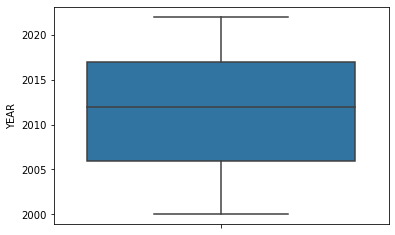

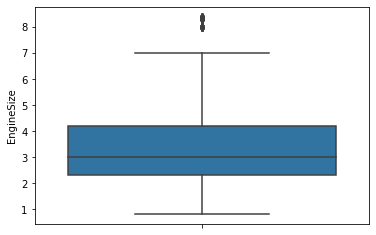

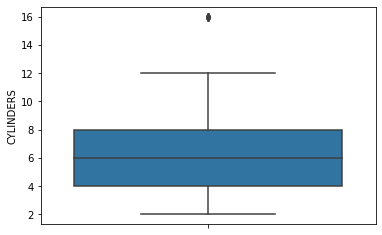

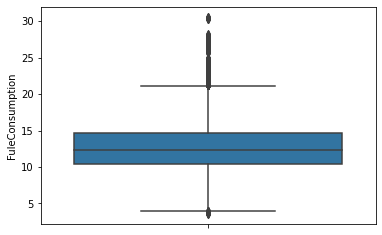

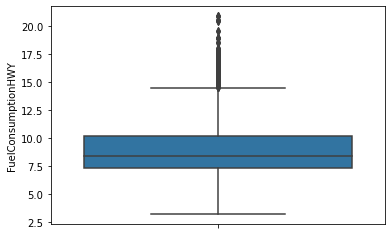

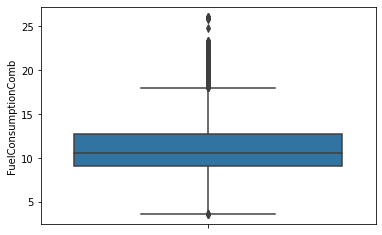

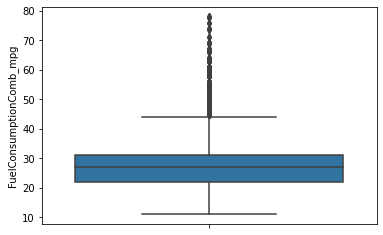

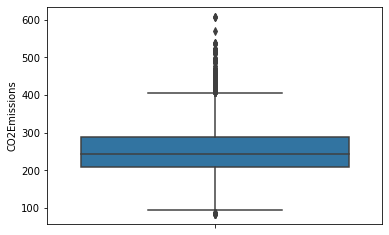

In [13]:
### Box Plot
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i])
        plt.show()

#### Outlier Treatment

In [14]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [15]:
for column in data.columns:
    if data[column].dtype !="object":
        UL,LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])
        

In [16]:
data.dropna(inplace=True)

#### Now again plot the graphs

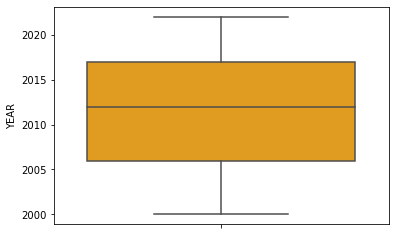

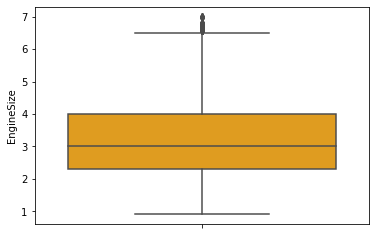

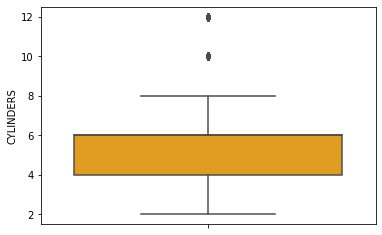

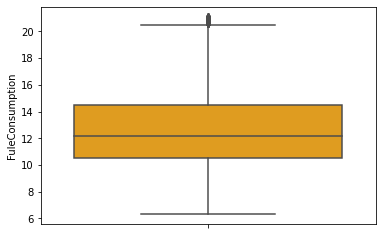

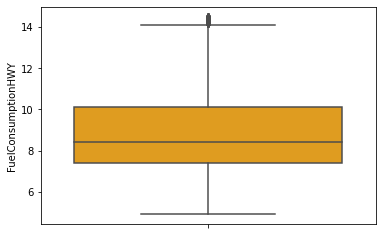

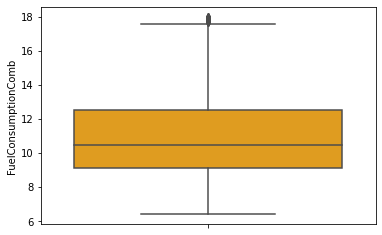

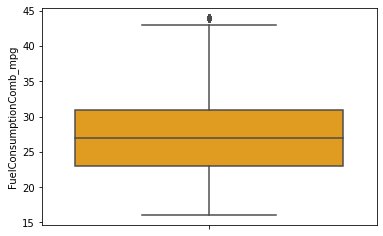

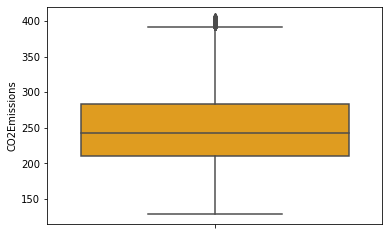

In [17]:
#### Box plot
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i],color = 'orange')
        plt.show()

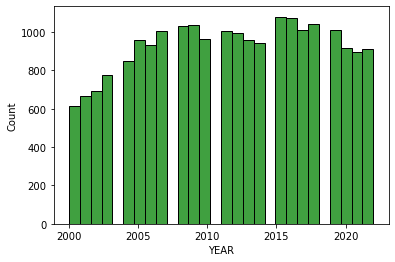

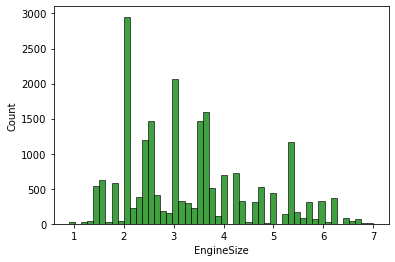

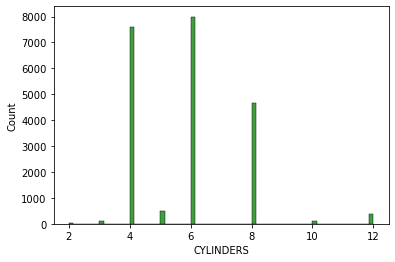

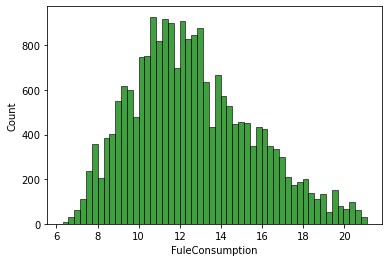

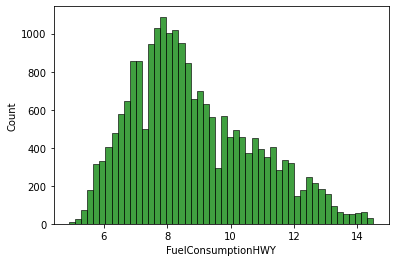

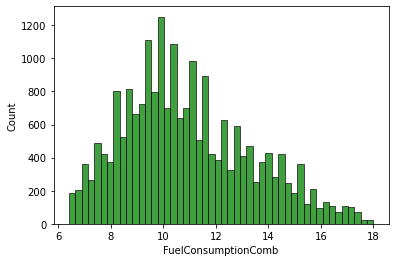

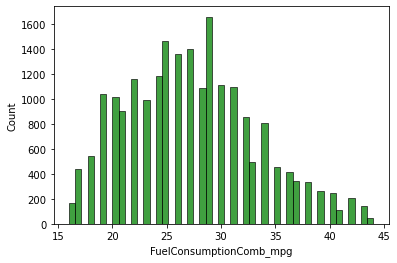

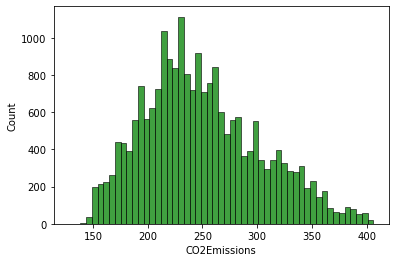

In [18]:
### Histogram
for i in data.columns:
    if data[i].dtype != "object":
        sns.histplot(x=data[i],color = 'green')
        plt.show()

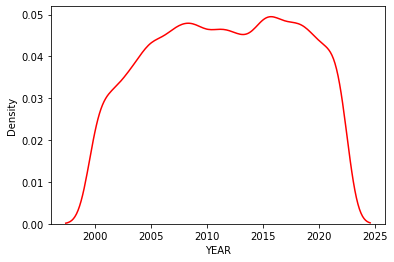

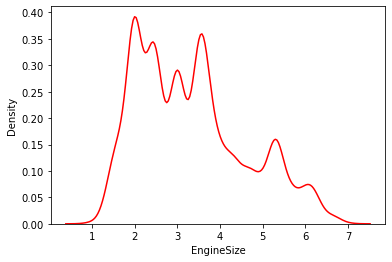

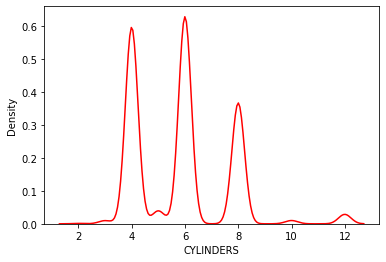

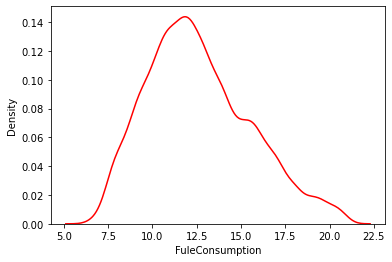

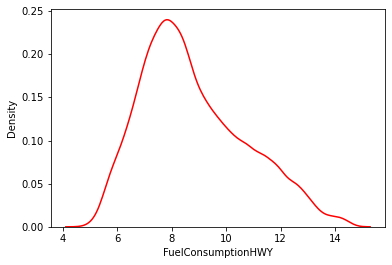

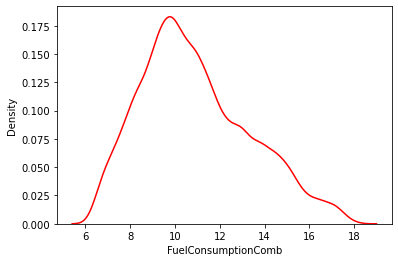

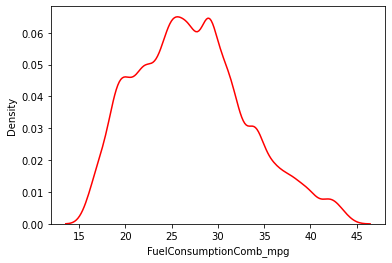

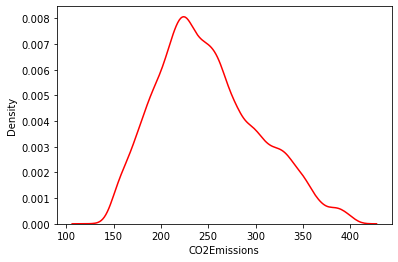

In [19]:
### Kde Plot
for i in data.columns:
    if data[i].dtype !="object":
        sns.kdeplot(x=data[i],color = 'red')
        plt.show()

### Multivariate analysis

### Bar Chart

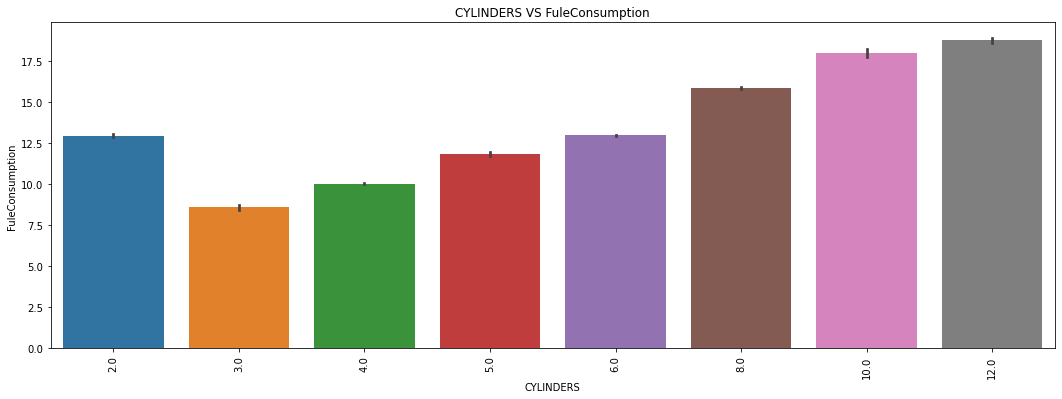

In [20]:
plt.figure(figsize=(18,6))
sns.barplot(x='CYLINDERS',y='FuleConsumption',data=data)
plt.title('CYLINDERS VS FuleConsumption')
plt.xticks(rotation=90)
plt.style.use('ggplot')

### Pie Chart

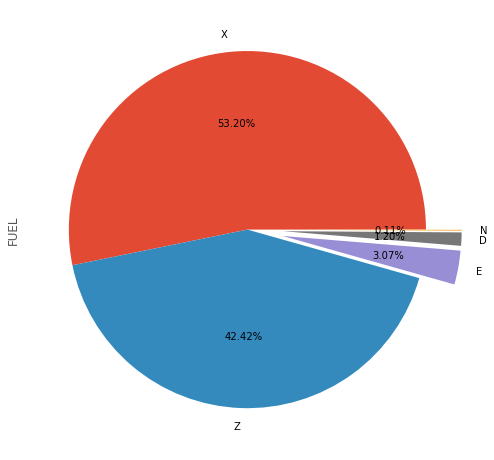

In [21]:
plt.figure(figsize=(8,10))
myexplode=[0,0,0.2,0.2,0.2]
data.FUEL.value_counts().plot.pie(autopct='%1.2f%%',explode=myexplode);

### Line chart

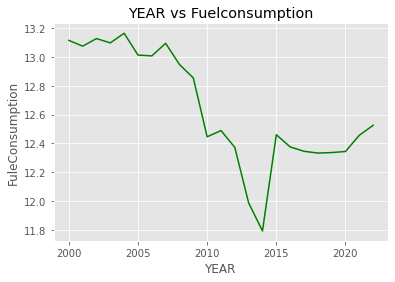

In [22]:
sns.lineplot(data=data,x="YEAR",y="FuleConsumption",color="Green",ci=None);
plt.title("YEAR vs Fuelconsumption");

### Scatter plot

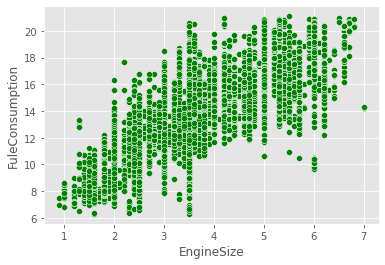

In [23]:
sns.scatterplot(data=data,x="EngineSize",y="FuleConsumption",color="Green");

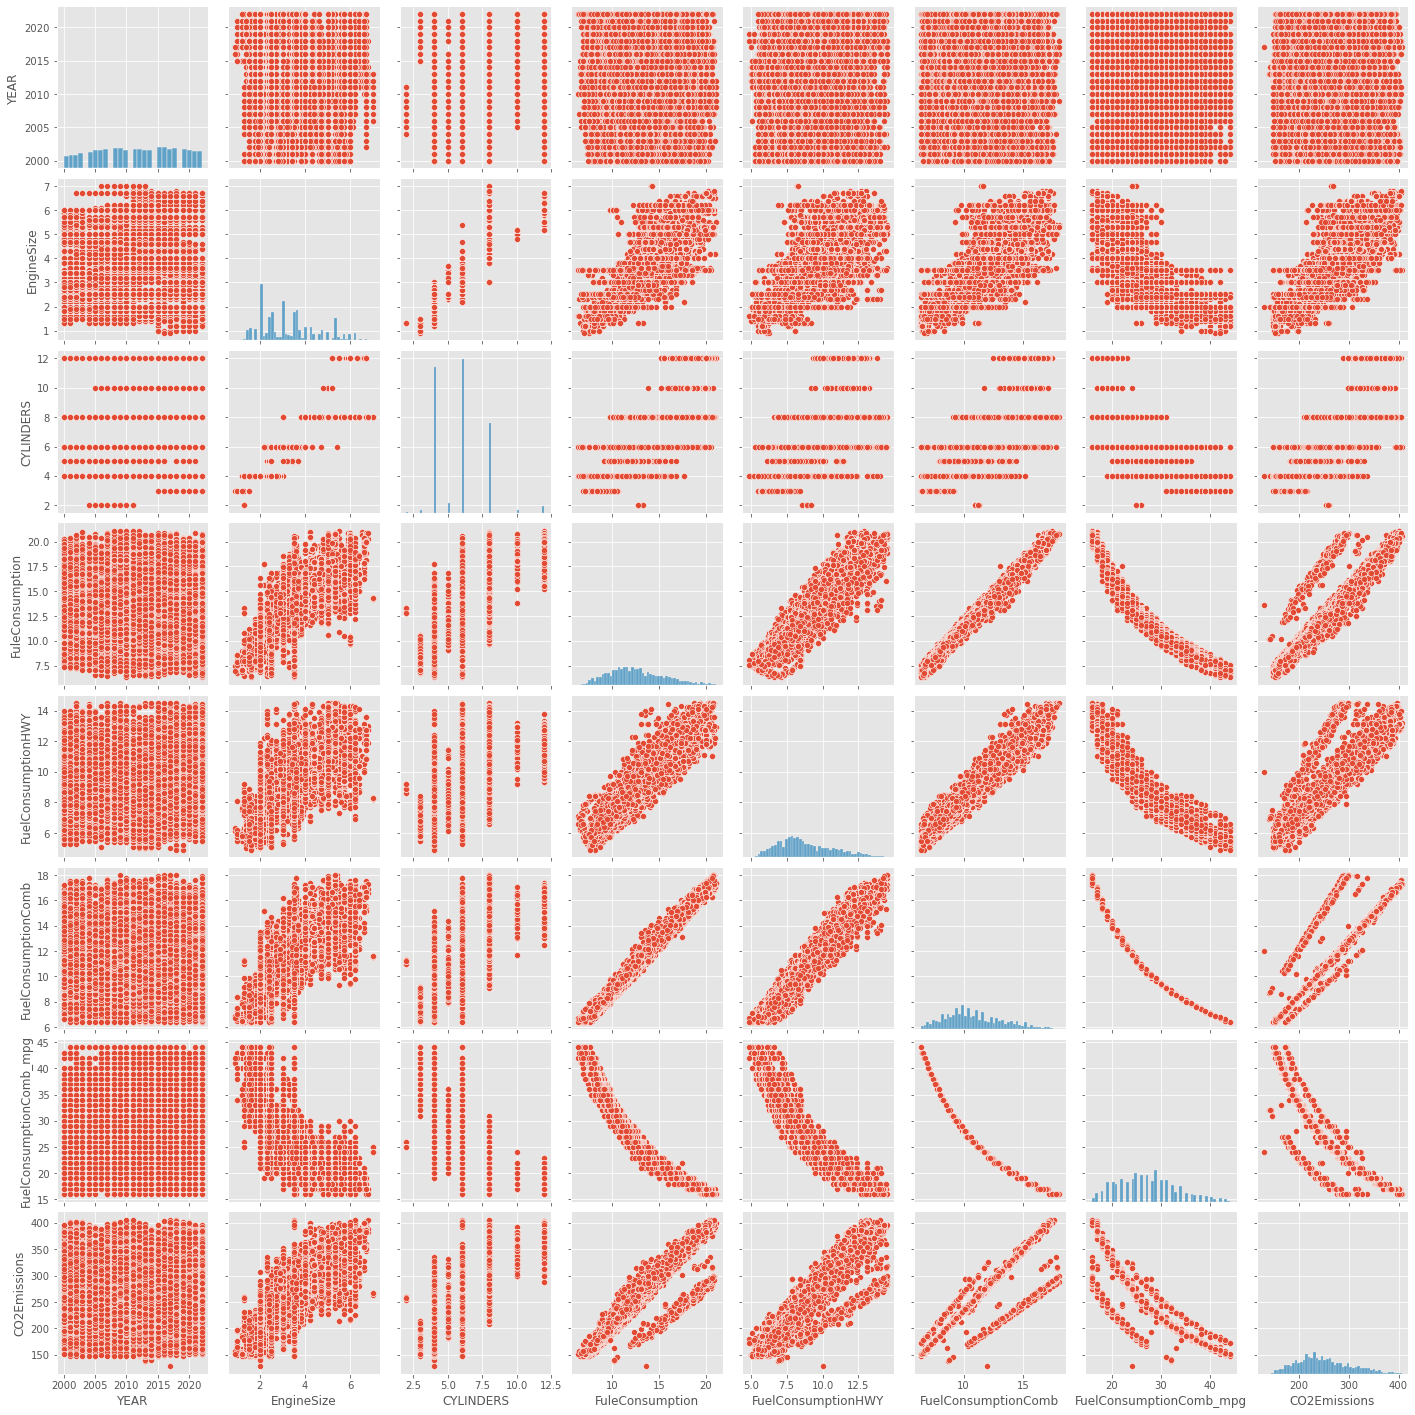

In [24]:
sns.pairplot(data);

#### Label Encoding to convert categorical variables

In [25]:
le = LabelEncoder()

In [26]:
data["MAKE"]=le.fit_transform(data["MAKE"])
data["MODEL"]=le.fit_transform(data["MODEL"])
data["VehicleClass"]=le.fit_transform(data["VehicleClass"])
data["TRANSMISSION"]=le.fit_transform(data["TRANSMISSION"])
data["FUEL"]=le.fit_transform(data["FUEL"])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21376 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YEAR                     21376 non-null  float64
 1   MAKE                     21376 non-null  int32  
 2   MODEL                    21376 non-null  int32  
 3   VehicleClass             21376 non-null  int32  
 4   EngineSize               21376 non-null  float64
 5   CYLINDERS                21376 non-null  float64
 6   TRANSMISSION             21376 non-null  int32  
 7   FUEL                     21376 non-null  int32  
 8   FuleConsumption          21376 non-null  float64
 9   FuelConsumptionHWY       21376 non-null  float64
 10  FuelConsumptionComb      21376 non-null  float64
 11  FuelConsumptionComb_mpg  21376 non-null  float64
 12  CO2Emissions             21376 non-null  float64
dtypes: float64(8), int32(5)
memory usage: 2.4 MB


#### Let's check the correlation of  other variables with the target variable "Fuelconsumption"

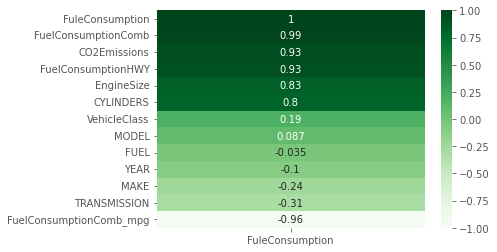

In [28]:
#### Heat Map
sns.heatmap(data.corr()[["FuleConsumption"]].sort_values(by="FuleConsumption",ascending=False),vmin=-1,vmax=1,annot=True,cmap="Greens");

#### Let's take only the variables which has good correlation with the target variable "Fuelconsumption"

In [29]:
x=data[["FuelConsumptionComb","CO2Emissions","FuelConsumptionHWY","EngineSize","CYLINDERS","VehicleClass","MODEL"]].values
y=data[["FuleConsumption"]].values

#### Scaling

In [30]:
sc = StandardScaler()

In [31]:
x=sc.fit_transform(x)

### cross validation

In [32]:
models ={
    "LinearRegression":LinearRegression(),
    "RidgeRegression":Ridge(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "DecisionTreeRegresssor":DecisionTreeRegressor(),
    "LinearSvr":LinearSVR(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [33]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse =np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("AVG RMSE : ",rmse_avg)
    print("*"*100)

cross validation model : LinearRegression
AVG RMSE :  0.08024635334537776
****************************************************************************************************
cross validation model : RidgeRegression
AVG RMSE :  0.08028823709454336
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVG RMSE :  0.44084345125720487
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVG RMSE :  0.19473459395486975
****************************************************************************************************
cross validation model : DecisionTreeRegresssor
AVG RMSE :  0.12478586939251748
****************************************************************************************************
cross validation model : LinearSvr
AVG RMSE :  0.0805179133022823
********************************************

### Since The Random Forest Regression Model has minimum rmse value. So select Random Forest Regression as model

In [34]:
model=LinearRegression()

##### Split the datase into training and testing data

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

###### Fit the model with the training data

In [36]:
model.fit(x_train,y_train)

LinearRegression()

### predicting the values using the model

In [37]:
y_pred=model.predict(x)

### after prediction we can compare it to the actual values

In [38]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("actual","predicted"),dtype="float")
OUTPUT.head()

,actual,predicted
0,9.2,9.249708
1,8.5,8.510370
2,12.2,12.116246
3,13.4,13.378142
4,10.0,9.906552


### Scatter plot

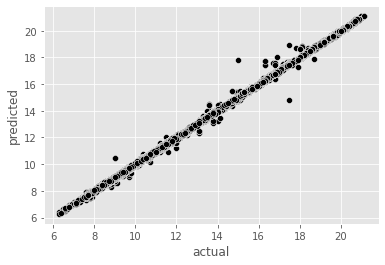

In [39]:
sns.scatterplot(data=OUTPUT,x="actual",y="predicted",color="Black");

In [40]:
model.score(x,y)

0.9992106560167249